# Borrower Reliability Study

In the modern world, big data is becoming more and more widespread. On the other hand, rhythms are accelerating, and the ability to quickly and correctly process such data becomes a competitive advantage. Another important factor is the automation of such a process, based on a specific model.
One of the clearest examples is the banking sector. In particular, one of the bank's needs is to quickly and efficiently predict risks when issuing loans, including to individuals.

From this point of view, credit scoring is useful - a system that evaluates the ability of a potential borrower to return a loan to a bank. What parameters can influence such ability?

**The purpose of this study** is to test the following hypotheses:
1. The marital status of a potential borrower affects the repayment of the loan on time.
2. The number of children in the family of a potential borrower affects the repayment of the loan on time.
3. The level of income of a potential borrower affects the repayment of the loan on time.
4. The purpose of obtaining a loan by a potential borrower affects the repayment of the loan on time.

**Research progress**:

We will try to test the above hypotheses against the bank's borrower statistics, which we will get from the data.csv file. Since we have no information about the format (except for the column names) and the quality of the data, before testing the hypotheses, we will review the data and pre-process it: this is necessary to eliminate errors that may affect the conclusions.


Thus, this study will include the following steps:

* review data
* data preprocessing
* testing hypotheses


## Data Overview

Let's make the first representation of the data. To view and analyze it, we import the pandas standard library, with which we will read the file in csv format, save it in the form of a table in a variable, as well as look at the first 10 lines:

In [60]:
import pandas as pd  # importing pandas library
data = pd.read_csv('data.csv')  # reading the csv file and saving to data
data.head(10)  # getting first 10 rows of the dataframe


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Let's get the general information on the data of the dataframe:

In [61]:
data.info() # displaying information on the dataframe data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


We noticed there are 12 columns in the dataframe. According to the data documentation, the following variables are stored in them:
- children — number of children in the family
- days_employed - total work experience in days
- dob_years — client's age in years
- education — the level of education of the client
- education_id — education level identifier
- family_status - marital status
- family_status_id - marital status identifier
- gender — gender of the client
- income_type - type of employment
- debt — whether he had any debt to repay loans
- total_income - monthly income
- purpose — the purpose of obtaining a loan

As you can see from the overview, not all columns have the data type as expected.

Let's check if there are any missing data:

In [62]:
data.isna().sum()  # displaying total number of missing values for eacg column

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

So, the data, as it usually happens, contains a number of missing values. Their importance may vary depending
from the presence / absence of duplicates, check the table for their presence:


In [63]:
data.duplicated().sum() # finding the total number of explicit duplicates

54

With respect to the number of rows (21525), there are few explicit duplicates in the dataframe (54).



Visualizing the variables may be helpful for a more efficient overview of the data.
For example, let's see the ratio of data on the target variable for which a scoring model must be created, that is
'debt' column:


<AxesSubplot:xlabel='debt', ylabel='Count'>

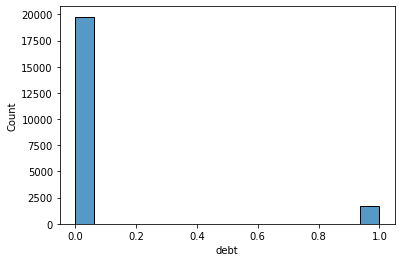

In [64]:
import seaborn as sns # importing seaborn library
sns.histplot(data['debt'])  # displaying the column values distribution with the use of histagram

Fortunately for the bank, the number of customers who repaid the loan significantly exceeds those who have debts.

Let's see also what is the gender ratio among debtors and clients who have repaid their debts:


<AxesSubplot:xlabel='debt', ylabel='Count'>

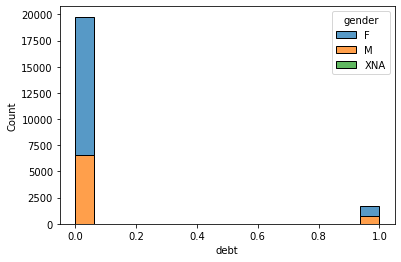

In [65]:
sns.histplot(x='debt', hue='gender', data=data, multiple="stack")  # displaying the column values distribution with the use of histagram

Among the clients who repaid the loan, there are more women. Also on the histogram legend we noticed an unexpected "XNA" value, the share of which, however, is not visible on the histogram: likely it is low.

Next, let's check how the age of customers and their income level are related:


[Text(0, 0, '0'),
 Text(0, 150000, '150000'),
 Text(0, 300000, '300000'),
 Text(0, 450000, '450000'),
 Text(0, 600000, '600000'),
 Text(0, 750000, '750000'),
 Text(0, 900000, '900000'),
 Text(0, 1050000, '1050000'),
 Text(0, 1200000, '1200000'),
 Text(0, 1350000, '1350000'),
 Text(0, 1500000, '1500000'),
 Text(0, 1650000, '1650000'),
 Text(0, 1800000, '1800000'),
 Text(0, 1950000, '1950000'),
 Text(0, 2100000, '2100000'),
 Text(0, 2250000, '2250000'),
 Text(0, 2400000, '2400000')]

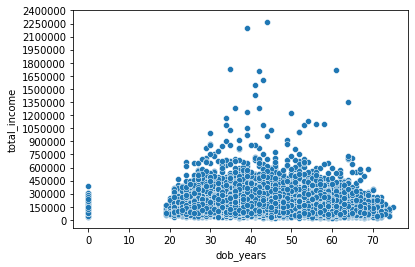

In [66]:
g = sns.scatterplot(x=data['dob_years'], y=data['total_income'], data=data) # displaying the column values distribution with the use of scatter plot
g.set_yticks(range(0, 2500000, 150000)) # setting ticks on  y axis
g.set_yticklabels(range(0, 2500000, 150000)) # setting labels on y axis

Based on the scatter plot, it can be assumed that there are not so many millionaires among borrowers. We can also notice that the highest income is for the category of clients from 30 to 40 years old.

In addition, this diagram allowed us to notice that there is an anomaly in the 'dob_years' column: several clients, for with an age of 0 years.


**In the next part of the study, we will eliminate all the anomalies identified during the data overview.**


## Data Preprocessing and Anomalies Elimination
### Filling in Missing Values
From the data overview of the data, it turned clear that there are missing values in the table, now it is necessary to estimate their ratio: a high ratio of missing values may distort the conclusions obtained after the analysis:


In [67]:
len(data[data['days_employed'].isna()]) / len(data['days_employed']) * 100 # calculating share of missing values



10.099883855981417

So, we should have noticed that in the 'days_employed' and 'total_income' columns, the percentage of missing values is approximately 10% of the total number of observations in them. At the same time, omissions occur in the same rows, that means, this information is not available for the same clients. It is impossible to set exact
reason for missing values: assumption that data is missing for not-working categories
clients ('unemployed', 'retired') is incorrect. There may have been an error while extracting data.

A tenth is quite a lot, we need to fill in the missing values. Since both columns
'days_employed' and 'total_income' are quantitative variables, the best option is
fill them with the median values for the relevant column. We are choosing the median over the mean
arithmetic, since the number of observations is large enough, and there is a possibility that among the values
outliers are present.


In [68]:
days_employed_median = data['days_employed'].median()  # calculating median of 'days_employed'
total_income_median = data['total_income'].median()  # calculating median of 'total_income'
data['days_employed'] = data['days_employed'].fillna(value=days_employed_median)  # filling in missing valuws with the median
data['total_income'] = data['total_income'].fillna(value=total_income_median)  # filling in missing valuws with the median
print(len(data[data['days_employed'].isna()]))  # checking the result after filling in
print(len(data[data['total_income'].isna()]))  # checking the result after filling in

0
0


### Data Type Change
Data overview allowed us to find iut that the data type in most cases corresponds to the contents of the columns, no need to convert, for example, strings to numeric values.
However, one of the anomalies is immediately noticeable: there are negative values in the column with total work experience in days. In addition, all values are floatl: this is also not entirely logical, given that the unit of measurement is a day.
To fix this problem, let's get rid of the negative values in the 'days_employed' column by applying to the whole
column the built-in function abs(). Next, to get rid of float values in the same column, we will use the astype() method. The same method will be applied to the "total_income" column. Further let's check the results.


In [69]:
data['days_employed'] = data['days_employed'].apply(abs)  # applying abs() function to the whole table to get rid of missing values
data['days_employed'] = data['days_employed'].astype('int')  # applying astype() method to get rid of float values
data['total_income'] = data['total_income'].astype('int')  # applying astype() method to get rid of float values
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем
7,0,152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823,образование
8,2,6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи


### Duplicates Removal
Earlier we found out that there are duplicate rows in the table. Like missing values, having duplicates in the dataframe may lead to a distortion of the conclusions of the study, so we shall to get rid of them:



In [70]:
data = data.drop_duplicates().reset_index(drop=True)  # getting rid of explicit duplicates
print(data.duplicated().sum())  # checking out the result


0


Thus, we got rid of 54 explicit duplicates in the available data.
As we have already noted, large amounts of data are very rarely ideal, in particular, duplicates may appear due to the human factor: incorrect input, incorrect data connection into one table.

Now let's move on to finding implicit duplicates. To do this, let's look again at the columns' names and the data types in them. Let's analyze the type of variables for each column. We can assume that 'education', 'family_status', 'gender','income_type', 'purpose', 'education_id', 'family_status_id', 'debt' are categorical variables, and that means their values in the table can reapeat, so it makes no sense to count their repetitions. In this case, it makes sense to check what unique values each categoricalvariable. Let's display the results:

In [71]:
# Checking out the unique values of all categorical variables iterating on each column:
features = ['education', 'family_status', 'gender', 'income_type', 'purpose', 'education_id', 'family_status_id', 'debt' ]
for feature in features:
    display(data[feature].unique())



array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

array(['F', 'M', 'XNA'], dtype=object)

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

array([0, 1, 2, 3, 4], dtype=int64)

array([0, 1, 2, 3, 4], dtype=int64)

array([0, 1], dtype=int64)

After having analyzed the lists of unique values, we noticed that implicit duplicates are present in 
'education' column. To get rid of them, let's bring all the values to the same case and check the results:


In [72]:
data['education'] = data['education'].str.lower() # converting all column values to lower case
display(data['education'].unique())  # checking the result


array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

When finding unique values, we noticed that the 'purpose' variable also contains
implicit "semantic" duplicates, so it needs further categorization. We will do such  transformation a bit later.

In addition, another anomaly (not a duplicate, but an incorrect value) is present in the 'gender' column: 'XNA'.
We found this value even earlier: at the stage of data review
Let's count its repetition:



In [73]:
data['gender'].value_counts() # counting unique values in 'gender'

F      14189
M       7281
XNA        1
Name: gender, dtype: int64

The anomalous value 'XNA' occurs only once, which, given the number of observations, is unlikely to skew the conclusions of the study. Moreover, the purpose of our study is not to test the hypothesis about the influence of gender onmloan repayment on time, so the 'gender' variable itself is irrelevant.


As far as it concerns quantitative variables, in the presented dataframe they are 'children', 'days_employed',
'dob_years', 'total_income'. The nature of such data suggests that the number of unique observations is unlimited,
on the other hand, one or more observations may be repeated. For example, among more than 20,000 bank customers, there may be customers with the same income, and such a repetition cannot be perceived as a duplicate.
For this reason, it makes no sense either to scan the unique values of quantitative variables, or to count their repetitions.
The only column where, from the point of view of our experience, there is unlikely to be a large scatter and variety of observations is the number of children in the family. Let's check the unique values of the 'children' column and count the unique values:


In [74]:
data['children'].value_counts()  # counting unique values in 'children'

 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Ma noticed an anomalous value for this metric: -1. It can be assumed that the causes and nature of this
anomaly match the anomaly in the 'days_employed' column, which also initially had negative values.
Let's get rid of the anomaly by replacing the given value with "1" in all rows:


In [75]:
data.loc[data['children']==-1, 'children'] = 1  # replacing the mistaken value in all rows with the chosen one
data['children'].value_counts() # checking the result

0     14107
1      4856
2      2052
3       330
20       76
4        41
5         9
Name: children, dtype: int64

Statistically speaking, there is another anomalous value in this column - 20. Let's assume that there was a failure in the data upload here too, and we interpret it as "2" (perhaps this is a consequence of the Russian state policy on the payment of maternity capital: for eahc child beginning with the second, the mother gets some money from the state to be spent on certian purposes: education, buying a house etc):


In [76]:
data.loc[data['children']==20, 'children'] = 2 # replacing the mistaken value in all rows with the chosen one
data['children'].value_counts() # checking the result

0    14107
1     4856
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

**Conclusions**

So, as a result of preprocessing, we solved the following issuess that were revealed in the overview phase:

- filled in the missing values,
- removed explicit and implicit duplicates,
- got rid of anomalous values.

All this will help us to further test the hypotheses without distorting the conclusions. In order to proceed to the final stage of the study, however, we also need to work on the visual perception of the dataframe and, if possible, categorize some features.



###  Creating Additional Dataframes, Decomposition of the Original Dataframe
Further, in order to simplify the visual perception of the dataframe and to simplify working with it, we will take out some data in separate dataframes.
In particular, such a transformation can be done in relation to education data, where each unique value has its own identification number:

In [77]:
education_data = data[['education', 'education_id']]  # creating a new dataframe with the information on education
education_data = education_data.drop_duplicates().reset_index(drop=True) # getting rid og duplicates in the new dataframe
education_data.head(10)  # checking the result

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


Let's do the same for the marital status data:

In [78]:
family_status_data = data[['family_status', 'family_status_id']]  # creating a new dataframe with the information on family status
family_status_data = family_status_data.drop_duplicates().reset_index(drop=True) # getting rid og duplicates in the new dataframe
family_status_data.head(10)  # checking the result


,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


By separating data on education and marital status into separate dataframes, we can "lighten" the main table:


In [79]:
data=data.drop(['education', 'family_status'], axis=1)  # deleting the column we copied to other dataframes

###  Income Categorization
To make it easier to test the hypothesis about the effect of income level on loan repayment terms, we categorize the data. To do this, we select several groups and set the minimum and maximum income levels for each. Using the function,  we will add the relevant column to the dataframe. Since we did not check the values of the 'total_income' column for abnormal values, for example, negative values, we will implement such a check in the  function body:

In [80]:
# Defining a function with one parameter 'income'
def income_group(income):  
    if income < 0:
        raise Exception()
    if 0 <= income <= 30000:
        return 'E'
    if 30001 <= income <= 50000:
        return 'D'
    if 50001 <= income <= 200000:
        return 'C'
    if 200001 <= income <= 1000000:
        return 'B'
    return 'A'
try:
    data['total_income_category'] = data['total_income'].apply(income_group)  # creating a new column in the dataframe by calling the income_group() function
except:
    print('The income can not be negative') # making sure in the column 'total_income' there is no anomalous data. In caase there are some, если они есть, the relevant message will be printed
data.head(10) # displaying the result

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C
5,0,926,27,0,1,M,компаньон,0,255763,покупка жилья,B
6,0,2879,43,0,0,F,компаньон,0,240525,операции с жильем,B
7,0,152,50,1,0,M,сотрудник,0,135823,образование,C
8,2,6929,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C
9,0,2188,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C


###  Loan Purposes Categorization 
When analyzing the unique values of the 'purpose' column, we already noticed that there are some "semantic duplicates" in it: values that are not equally expressed from a lexical point of view, but have the same meaning. 
It  makes sense to categorize such values, bringing similar loan purposes to a certain common denominator. We will carry out this transformation in order to test one of the hypotheses: the relationship between the purposes of loan and the terms of repayment. To categorize these data, another function will help us, by calling which we will add a new 'purpose_category' column to the table:

In [81]:
# Defining a function with one parameter 'purpose' 
def purpose_group(purpose):  
    if 'жиль' in purpose or 'недвижимост' in purpose:
        return 'real estate activities'
    elif 'автомобил' in purpose:
        return 'purchase of a vehicle'
    elif 'свадьб' in purpose:
        return 'wedding arrangements'
    return 'education purposes'
data['purpose_category'] = data['purpose'].apply(purpose_group) # creating a new column in the dataframe by calling purpose_group() function 
data.head(10) # displaying the result

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B,real estate activities
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,purchase of a vehicle
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C,real estate activities
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,education purposes
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,wedding arrangements
5,0,926,27,0,1,M,компаньон,0,255763,покупка жилья,B,real estate activities
6,0,2879,43,0,0,F,компаньон,0,240525,операции с жильем,B,real estate activities
7,0,152,50,1,0,M,сотрудник,0,135823,образование,C,education purposes
8,2,6929,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C,wedding arrangements
9,0,2188,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C,real estate activities


**Conclusions**

So, as a result of further transformations of the dataframe, we managed to:

- improve the visualization and perception of the dataframe,
- categorize both some categorical and quantitative variables.

Without such transformations, it would have been impossible to combine the data into some groups, on which, finally, we can test our hypotheses.


## Hypothesis Testing
After having prepared the data, we can start testing hypotheses.
In order to carry out the testing, we need to analyze the number of debtors against the total number of observations for each of the groups. To do this, for each of the columns 'family_status_id', 'children', 'total_income_category', 'purpose_category', we will prepare a summary table by category, broken down by the absence of debt (0) and the presence of debt (1), adding a column that will show the ratio of debtors to the total number of clients in each group as a percentage.

Let's start by testing the hypothesis about the influence of marital status on loan repayment on time:


In [82]:
pivot_family_status = data.pivot_table(index='family_status_id', aggfunc ={'debt': ['mean']})  # creating a pivot table
pivot_family_status['debt'] = (pivot_family_status['debt']*100).astype(str).add('%')  # transforming in % the debtor's share
pivot_family_status.head(10)  # displaying the result




,debt
,mean
family_status_id,
0,7.542125729099157%
1,9.320201777564256%
2,6.569343065693431%
3,7.112970711297072%
4,9.750889679715302%


Next, using the same method, we will test the hypothesis about the effect of the number of children in family on loan repayment on time:


In [83]:
pivot_children = data.pivot_table(index='children', aggfunc ={'debt': ['mean']})  # creating a pivot table
pivot_children['debt'] = (pivot_children['debt']*100).astype(str).add(' %')  # transforming in % the debtor's share
pivot_children.head(10) # displaying the result

,debt
,mean
children,
0,7.535266179910682 %
1,9.163920922570016 %
2,9.492481203007518 %
3,8.181818181818182 %
4,9.75609756097561 %
5,0.0 %


The following hypothesis: the income level of a potential borrower affects the repayment of the loan on time:



In [84]:
pivot_total_income = data.pivot_table(index='total_income_category', aggfunc ={'debt': ['mean']})  # creating a pivot table
pivot_total_income['debt'] = (pivot_total_income['debt']*100).astype(str).add(' %')  # transforming in % the debtor's share
pivot_total_income.head(10)  # displaying the result

,debt
,mean
total_income_category,
A,8.0 %
B,7.062090854989089 %
C,8.482504833780329 %
D,6.0 %
E,9.090909090909092 %


And finally, let's analyze whether the purpose of obtaining a loan by a potential borrower affects the loan repayment on time:


In [85]:
pivot_purpose = data.pivot_table(index='purpose_category', aggfunc ={'debt': ['mean']})  # creating a pivot table
pivot_purpose['debt'] = (pivot_purpose['debt']*100).astype(str).add(' %')  # transforming in % the debtor's share
pivot_purpose.head(10)  # displaying the result

,debt
,mean
purpose_category,
education purposes,9.217737917289487 %
purchase of a vehicle,9.35468895078923 %
real estate activities,7.231366746809691 %
wedding arrangements,7.965738758029979 %


**Conclusions**

After having analyzed the pivot tables, we noticed that the number of debtors in each of the groups categories is approximately the same:
* in the pivot table by marital status, this category ranges from 6-9%
* in the pivot table by the number of children in a family it is 8-11%, excluding families with 5 children, where it is equal to 0%, but the number of observations in this category is too small (9) to affect the overall trend
* in the pivot table by income level, it also varies from 6 to 9%
* in the pivot table by  the purpose of obtaining a loan, the range is 7-9%

**The above data allow us to state that none of the 4 hypotheses has been confirmed.**
**Выводы**




## Study Results
We tested four hypotheses and found that:

1. the marital status of a potential borrower does not affect the repayment of the loan on time
2. the number of children in the family of a potential borrower does not affect the repayment of the loan on time
3. the income level of a potential borrower does not affect the repayment of the loan on time
4. the purpose of obtaining a loan by a potential borrower does not affect the repayment of the loan on time

Thus, none of the hypotheses was confirmed.

In each category of the metrics we are interested in, the range of the ratio of debtors against the total number of clients in the category amounted to a maximum of 3%. In addition, the number of observations in each category is not the same, for this reason it is logical to assume that a small difference is natural and acceptable.

With regard to the practical application of this study, statistical data from only one bank is unlikely to be sufficient to build a general scoring model. In addition, it is likely that the behavior of customers will change if the bank changes the conditions for issuing loans.
